<a href="https://colab.research.google.com/github/Vonewman/Audio-course-hf/blob/main/Charger_et_explorer_un_jeu_de_donnees_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charger et explorer un jeu de donnees audio

In [1]:
!pip install -q datasets[audio]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.6 MB/s eta 0:00:00


### Load the data

In [2]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

Le jeu de données contient 654 fichiers audio, chacun étant accompagné d’une transcription, d’une traduction en anglais et d’une étiquette indiquant l’intention derrière la requête de la personne. La colonne audio contient les données audio brutes. Examinons de plus près l’un des exemples:

Copied


In [3]:
example = minds[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

Vous remarquerez peut-être que la colonne audio contient plusieurs caractéristiques :

- `path` : le chemin d’accès au fichier audio (*.wav dans ce cas).
- `array`: les données audio décodées, représentées sous la forme d’un tableau NumPy à 1 dimension.
- `sampling_rate` : taux d’échantillonnage du fichier audio (8 000 Hz dans cet exemple). Le intent_class est une catégorie de classification de l’enregistrement audio. Pour convertir ce nombre en une chaîne significative, nous pouvons utiliser la méthode int2str():
Copied


In [4]:
id2label = minds.features["intent_class"].int2str
id2label

<bound method ClassLabel.int2str of ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None)>

In [5]:
id2label(example["intent_class"])

'pay_bill'

Si vous regardez la fonction de transcription, vous pouvez voir que le fichier audio a effectivement enregistré une personne posant une question sur le paiement d’une facture. Si vous envisagez d’entraîner un classifieur audio sur ce sous-ensemble de données, vous n’aurez pas nécessairement besoin de toutes les caractéristiques. Par exemple, le lang_id aura la même valeur pour tous les exemples et ne sera pas utile. Les english_transcription dupliqueront probablement la transcription de ce sous-ensemble, afin que nous puissions les supprimer en toute sécurité.

Vous pouvez facilement supprimer les caractéristiques non pertinentes à l’aide de la méthode remove_columns de 🤗 Datasets :

In [6]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [8]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.3 MB/s eta 0:00:00


In [9]:
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:183: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://a194d1d686c889f613.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a194d1d686c889f613.gradio.live


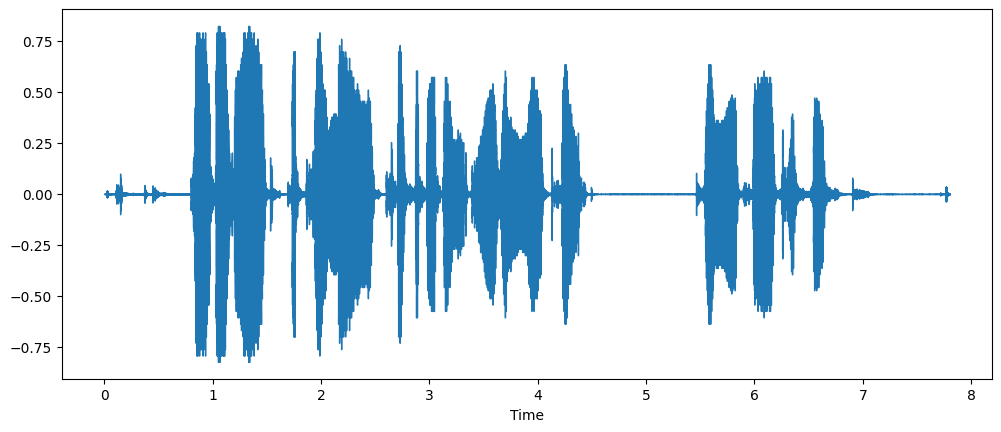

In [10]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

### Test the waxal dataset

In [11]:
from datasets import load_dataset

dataset = load_dataset("galsenai/waxal_dataset", split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/26387 [00:00<?, ? examples/s]

In [12]:
dataset

Dataset({
    features: ['audio', 'label', 'translation', 'locale_id', 'transcript'],
    num_rows: 26387
})

In [13]:
example = dataset[0]
example

{'audio': {'path': 'dio_0.mp3',
  'array': array([ 0.00000000e+00,  3.19722357e-13,  2.82773940e-13, ...,
          8.73977842e-06, -9.05591332e-06, -2.67952855e-05]),
  'sampling_rate': 48000},
 'label': 7,
 'translation': 'Lit',
 'locale_id': 3,
 'transcript': 'Bacaac'}

In [14]:
id2label = dataset.features["label"].int2str
id2label

<bound method ClassLabel.int2str of ClassLabel(names=['A canoon', 'A cinj', 'A keen', 'A lanq', 'A ñaaƴ', 'A ñamaak', 'Alaa', 'Bacaac', 'Benn', 'Bálamuk', 'Búbaar', 'Caggal', 'Ceme', 'Ci ginnaaw', 'Ci kanam', 'Ci kow', 'Ci suuf', 'Càmmoñ', 'Darnde', 'Dow', 'Doxal', 'Déedet', 'Eey', 'Esuwa', 'Eyen', 'Eé', 'Fatiya', 'Fukk', 'Funoom', 'Futok', 'Futok di sibaakiir', 'Futok di sigaba', 'Futok di sífeejir', 'Futok di yákon', 'Fácul', 'Garab', 'Goo', 'Hani', 'Jaay', 'Jeegom', 'Jeenay', 'Jeetati', 'Jeeɗiɗi', 'Jik', 'Jiku', 'Joy', 'Juni', 'Junne', 'Juroom', 'Juroom-benn', 'Juroom-ñaar', 'Juroom-ñeent', 'Juroom-ñett', 'Jënd', 'Kakamben', 'Kamay', 'Kanoomen', 'Kákambul', 'Kárir', 'Lal', 'Lees', 'Leng', 'Leɗki', 'Li', 'Mbaamir', 'Mbalndi', 'Nano', 'Naxik', 'Nay', 'Ndaxar', 'Ndeyjoor', 'Ndiga', 'Ndiiƭ', 'Njong', 'O ɓox', 'Picc', 'Rawaandu', 'Sappo', 'Sibaakiir', 'Sigaba', 'Solndu', 'Soodde', 'Sífeejir', 'Tadik', 'Tati', 'Taxawal', 'Teemedere', 'Teemeed', 'Tentaam', 'Tik', 'Took', 'Tus', 'Téemeer', 

In [15]:
id2label(example["label"])

'Bacaac'

In [16]:
columns_to_remove = ["locale_id", "transcript"]
dataset = dataset.remove_columns(columns_to_remove)
dataset

Dataset({
    features: ['audio', 'label', 'translation'],
    num_rows: 26387
})

In [17]:
dataset[0]

{'audio': {'path': 'dio_0.mp3',
  'array': array([ 0.00000000e+00,  3.19722357e-13,  2.82773940e-13, ...,
          8.73977842e-06, -9.05591332e-06, -2.67952855e-05]),
  'sampling_rate': 48000},
 'label': 7,
 'translation': 'Lit'}

In [19]:
import gradio as gr


def generate_audio():
    example = dataset.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["label"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:183: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://82f02a65d15c5a6dbb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://82f02a65d15c5a6dbb.gradio.live


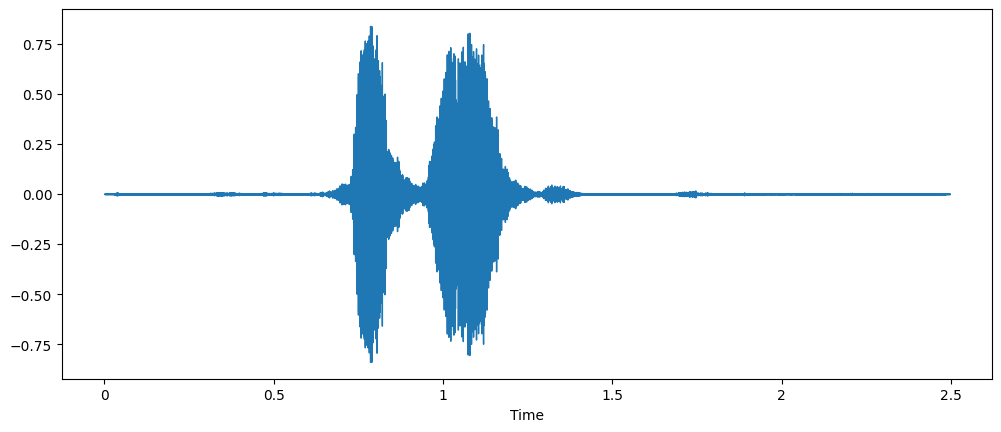

In [20]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)